In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial import distance_matrix
import pandas as pd

df = pd.read_csv('data2Dset4.csv', header=None)
df

,0,1
0,-0.016537,0.523408
1,0.971732,0.177843
2,-0.403983,0.171210
3,-0.406715,-0.207174
4,-0.055831,-0.985840
...,...,...
95,-0.167676,0.900371
96,0.384809,-0.339201
97,0.283005,0.389240
98,-0.890911,-0.558803


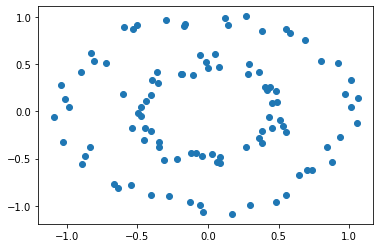

In [43]:
plt.scatter(df[0],df[1])
plt.show()

In [44]:
from sklearn import cluster

k_mean_model = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_mean_model.fit(df)

print(k_mean_model)

df['cluster_id'] = k_mean_model.labels_

centroids = k_mean_model.cluster_centers_
print(centroids)

KMeans(max_iter=50, n_clusters=3, random_state=1)
[[-0.23950726 -0.59825749]
 [ 0.61792892  0.08100659]
 [-0.39857943  0.47475354]]


In [45]:
df

,0,1,cluster_id
0,-0.016537,0.523408,2
1,0.971732,0.177843,1
2,-0.403983,0.171210,2
3,-0.406715,-0.207174,0
4,-0.055831,-0.985840,0
...,...,...,...
95,-0.167676,0.900371,2
96,0.384809,-0.339201,1
97,0.283005,0.389240,1
98,-0.890911,-0.558803,0


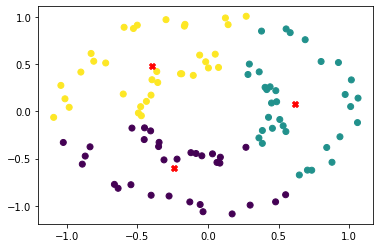

In [46]:
plt.scatter(df[0],df[1], c=df['cluster_id'])
plt.scatter(centroids[:,0],centroids[:,1],c='r',marker='X')
plt.show()

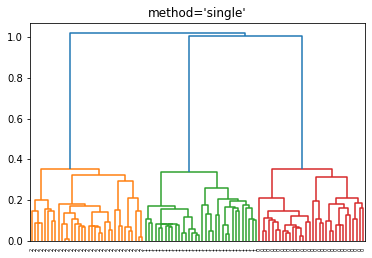

In [47]:
linkage_single = linkage(df, method = 'single', metric = 'euclidean')
dendrogram(linkage_single, labels =  df['cluster_id'].to_list())

plt.title("method='single'")
plt.show()

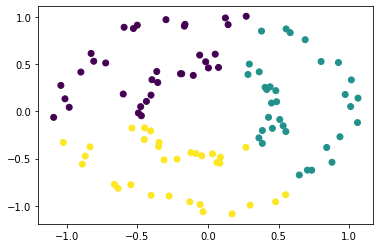

In [48]:
cluster_id = fcluster(linkage_single, t=1, criterion='distance')
plt.scatter(df[0],df[1], c=cluster_id)
plt.show()

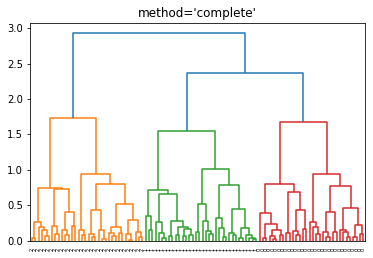

In [50]:
linkage_complete = linkage(df, method = 'complete', metric = 'euclidean')
dendrogram(linkage_complete, labels =  df['cluster_id'].to_list())

plt.title("method='complete'")
plt.show()

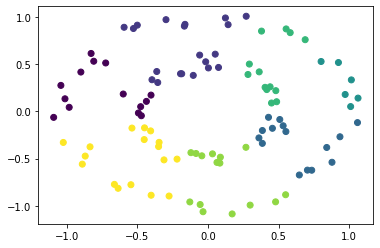

In [51]:
cluster_id = fcluster(linkage_complete, t=1, criterion='distance')
plt.scatter(df[0],df[1], c=cluster_id)
plt.show()

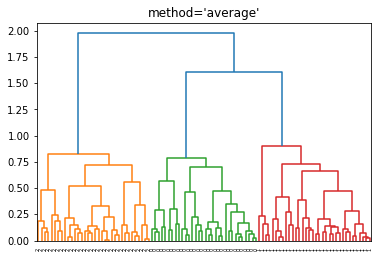

In [54]:
linkage_average = linkage(df, method = 'average', metric = 'euclidean')
dendrogram(linkage_average, labels =  df['cluster_id'].to_list())

plt.title("method='average'")
plt.show()

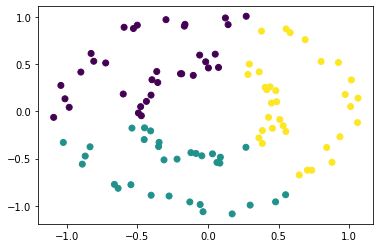

In [53]:
cluster_id = fcluster(linkage_average, t=1, criterion='distance')
plt.scatter(df[0],df[1], c=cluster_id)
plt.show()